In [1]:
import pandas as pd
import numpy as np

path = "train.csv"
data = pd.read_csv(path, index_col="PassengerId")
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


In [2]:
shape = data.shape
print(f"Shape: {shape}")
data.drop_duplicates(inplace=True)
print(f"No. of duplicates: {data.shape[0] - shape[0]}")
data.info()
data.head()
# Only ~30% rows have all columns present, so will drop NaNs only when it's required

Shape: (100000, 11)
No. of duplicates: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [4]:
data['Sex_bin'] = data['Sex'] == 'male'

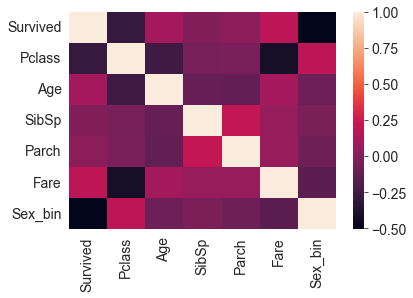

In [5]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14

matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.heatmap(data.corr());

In [6]:
# Feature Engineering like in https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
data['Deck']=data['Cabin'].map(lambda x: str(x)[0] if str(x) != 'nan' else np.NAN)
data['Family_Size']=data['SibSp']+data['Parch']
data['Age*Class']=data['Age']*data['Pclass']
data['Fare_Per_Person']=data['Fare']/(data['Family_Size']+1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,Deck,Family_Size,Age*Class,Fare_Per_Person
PassengerId,,,,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,True,C,2,NaN,9.046667
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,True,NaN,0,NaN,13.350000
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,True,NaN,3,0.99,17.822500
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,True,NaN,0,57.00,13.040000
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,True,NaN,0,75.00,7.760000


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Survived, %')

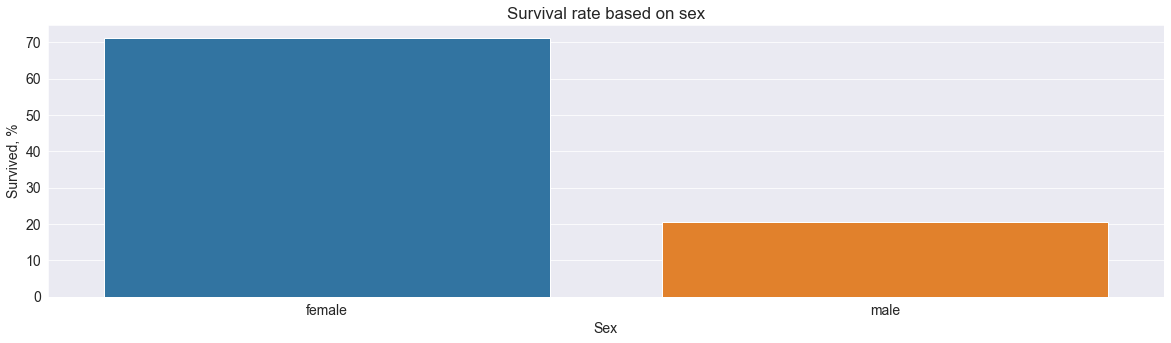

In [7]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
survivors = data[data['Survived'] == 1]

# All rows have sex column value, so no need to drop anything
sex_survivors = survivors.groupby('Sex').size().reset_index(name='Count')
sex_overall = data.groupby('Sex').size().reset_index(name='Count')
sex_survivors['Percentage'] = (sex_survivors['Count'] / sex_overall['Count']) * 100

sns.barplot('Sex','Percentage',   data = sex_survivors)
plt.title('Survival rate based on sex')
plt.ylabel('Survived, %')

In [ ]:
age_data = data[data['Age'].notnull()]
age_data['Age'] = age_data['Age'].astype('int64')

age_data_groups = age_data.groupby('Age').size().reset_index(name='Count')
age_survivors_groups = age_data[age_data['Survived'] == 1]
age_survivors_groups = age_survivors_groups.groupby('Age').size().reset_index(name='Count')
age_survivors_groups['Percentage'] = (age_survivors_groups['Count'] / age_data_groups['Count']) * 100

sns.barplot('Age','Percentage',   data = age_survivors_groups)
plt.title('Survival rate based on age')
plt.ylabel('Survived, %')
plt.xticks(rotation=-90)

C:\Users\Yor\AppData\Local\Temp\ipykernel_19656\1927637436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['Age'] = age_data['Age'].astype('int64')
C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29

In [ ]:
deck_data = data[data['Deck'].notnull()]

deck_data_groups = deck_data.groupby('Deck').size().reset_index(name='Count')
deck_survivors_groups = deck_data[deck_data['Survived'] == 1]
deck_survivors_groups = deck_survivors_groups.groupby('Deck').size().reset_index(name='Count')
deck_survivors_groups['Percentage'] = (deck_survivors_groups['Count'] / deck_data_groups['Count']) * 100

sns.barplot('Deck','Percentage',   data = deck_survivors_groups)
plt.title('Survival rate based on deck')
plt.ylabel('Survived, %')


In [ ]:
class_data = data[data['Pclass'].notnull()]

class_data_groups = class_data.groupby('Pclass').size().reset_index(name='Count')
class_survivors_groups = class_data[class_data['Survived'] == 1]
class_survivors_groups = class_survivors_groups.groupby('Pclass').size().reset_index(name='Count')

class_survivors_groups['Percentage'] = (class_survivors_groups['Count'] / class_data_groups['Count']) * 100

sns.barplot('Pclass','Percentage',   data = class_survivors_groups)
plt.title('Survival rate based on class')
plt.ylabel('Survived, %')

In [ ]:
family_data = data[data['Family_Size'].notnull()]

family_data_groups = family_data.groupby('Family_Size').size().reset_index(name='Count')
family_survivors_groups = family_data[class_data['Survived'] == 1]
family_survivors_groups = family_survivors_groups.groupby('Family_Size').size().reset_index(name='Count')

family_survivors_groups['Percentage'] = (family_survivors_groups['Count'] / family_data_groups['Count']) * 100

sns.barplot('Family_Size','Percentage',   data = family_survivors_groups)
plt.title('Survival rate based on family size')
plt.ylabel('Survived, %')